# Cross-validation methods

In this lab we will become acquainted with two resampling methods that can be used to construct training and test sets. 

## Goals of the lab:
* Understand the limitations of the simple validation set approach and the benefits of more refined approaches
* Learn to use the cv.glm() function to implement
    * leave-one-out cross-validation (LOOCV)
    * $k$-fold cross-validation ($k$-fold CV)
* Understand the bias-variance trade-off in the context of these resampling methods

This lab draws from the practice sets at the end of Chapter 5 in James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). "An introduction to statistical learning: with applications in r." 

# Why not use the simple validation set approach?

While the simple hold-out test set is relatively simple and easy to implement, there are significant drawbacks.

* The validation estimate of the test error rate can be highly variable 
* Only a subset of observations (those in the training set) are used to train the model
    * This limits your statistical power, and may lead to *overestimating* test error rate 
        
Cross-validation, a reampling method used to partition your data into test and training sets, addresses both of these issues. 

Let's see how this is true.

----
# Validation data sets

Here we will explore test error rates using cross-validation. We'll be using the Auto data set again from the ISLR library. 

First, we should acknowledge that you'll need to reset the seed for your random number generator. For this use the [_set.seed()_](https://www.rdocumentation.org/packages/simEd/versions/1.0.3/topics/set.seed) function. We want to use the same seed as the book so that you get the same results.

In [8]:
library(ISLR)
set.seed(1) #set the seed for the random number generator. resetting the seed will give different results.
train=sample(x=392,size=196) 

Above we choose 196 unique random samples out of a list ranging from 1-392. These indices will identify our training set.

In [9]:
train

[1] 105 146 224 354  79 348 365 255 242  24 388  68 262 391 292 188 270 372
 [19] 143 290 387 382 384  47  99 142   5 140 317 124 175 217 178  67 297 239
 [37] 283  39 257 379 289 228 275 194 185 274   9 165 252 238 164 294 149  83
 [55] 383  34 107 174 222 136 304  98 152 110 214  85 157 250  28 356 329 376
 [73] 111 336 330 323 347 123 245 301 333 334 363 101 234  63 218  38  75  44
 [91]  73  18 193 263 233 237 135 121 357 360 192 103 371 287 183  62 305 137
[109] 299 170 276 206 100 295  42   4 198  29 315 362 321 296 131 369 203 122
[127] 312  55  61 326 151  21  10 167 240 154 144 271 251 129 173 380  60  65
[145] 181 112 303 288  26 211 340 385 373 109 120  43 125 313 249  50 359 207
[163] 291 179 201  94  15  76 163 225 386 186 189  86 339 195 311 160 130 300
[181] 307  41 187 106 314  40 284 370 213 247 256 258 261 375  57 117

Now let's fit some models doing the training-testing approach that we've used so far in this class.

In [10]:
# attach(Auto)

# Generate a linear model using the training subset
lm.fit = lm(mpg~horsepower, data=Auto, subset=train)
mean((Auto$mpg-predict(lm.fit,Auto))[-train]^2) # Mean Squared Error (MSE)

# Use the poly() function to estimate test error
# for polynomial and cubic regressions
# 2nd degree polynomial
lm.fit2 = lm(Auto$mpg~poly(horsepower,4), data=Auto, subset=train)
mean((Auto$mpg-predict(lm.fit2,Auto))[-train]^2) # Mean Squared Error (MSE)

# 3rd degree polynomial
lm.fit3 = lm(Auto$mpg~poly(horsepower,6), data=Auto, subset=train)
mean((Auto$mpg-predict(lm.fit3,Auto))[-train]^2)

[1] 26.14142

[1] 19.99969

[1] 20.823

So the MSE we observe for the linear and the two polynomial models (quadratic & cubic) is 26.14, 19.82, and 19.78 respectively. **But these exact values are sensitive to the particular subset we selected.** Let's repeat this selecting a different subset of the Auto data.

In [11]:
# Notice that if we use a different subsample we'd get different results
set.seed(2) #using a different seed.. 
train=sample(392,196)
train

[1]  73 275 224  66 367 366  50 321 180 211 212  92 289  69 154 322 368  85
 [19] 167  28 247 144 310  56 128 384  55 131 351  49   4  60 292 312 185 390
 [37] 301 102 237  54 346 105  41  57 329 276 338 121 173 278   3   6 233 316
 [55]  94 274 265 332 206 354 256 294 207  86 282 371 127 150  71  22  89 100
 [73]  14  59 319 240 381 337 326 388 110 209   8 124  62 263 298  99 223 104
 [91] 295 120 114 168 139 318 314 373  34 129 297 125 285 317  83 172 258 130
[109]  42  37   7 330 364 161 230 226 241  31 262 156  11  67 336 239  65 203
[127] 325  81 184 377 387 380 341 250  82 287 137 311  48 355  45  72 158  75
[145] 111 181 165  77 117 324 252  87 217  95 186  68 202 350  19 379 195 219
[163] 272 174 333 148  20 220 362 345 215  23 349 197 375 344  76  30 140 116
[181] 201 304 382 164  25 229  18 378 320  16 323 286 232  33 385  40

In [12]:
# Linear model
lm.fit = lm(mpg~horsepower, data=Auto, subset=train)
mean((Auto$mpg-predict(lm.fit,Auto))[-train]^2)

# Polynomial
lm.fit2 = lm(mpg~poly(horsepower,4), data=Auto, subset=train)
mean((Auto$mpg-predict(lm.fit2,Auto))[-train]^2)

# Cubic
lm.fit3 = lm(mpg~poly(horsepower,6), data=Auto, subset=train)
mean((Auto$mpg-predict(lm.fit3,Auto))[-train]^2)

[1] 23.29559

[1] 20.38538

[1] 19.96347

If we repeated this procedure a number of times with different seeds, we would see a pattern that looks like this. Here, each line represents the test set error for a different set of randomly chosen training samples for a set of polynomial regressions. Depending on the specific training set we use, the test error estimate varies substantially. 

<img src="imgs/mse_variability.png" alt="drawing" width="700"/>

---
# Leave-one-out cross-validation (LOOCV)

Leave-one-out cross-validation (LOOCV) repeatedly splits the set of $n$ data points into a training set (blue) that has all except one observation, and a validation set that has only a single observation (beige). The test error is estimated by averaging the $n$ resulting MSEs. Below, the first training set contains everything except observation 1, the second training set contains everything except observation 2, and this continues until $n$ training sets are created and tested.


<img src="imgs/loocv.png" alt="drawing" width="700"/>

The [_boot_](https://cran.r-project.org/web/packages/boot/boot.pdf) library in R has many tools to perform LOOCV using a model fit object. Let's try performing LOOCV using the _glm()_ function and the _cv.glm()_ function.

We'll start with a simple linear regression model predicting _mpg_ from _horsepower_, using the full data set.

In [13]:
# Continue with the Auto example
glm.fit = glm(mpg~horsepower, data=Auto)
coef(glm.fit)

(Intercept)  horsepower 
 39.9358610  -0.1578447

Now let's use LOOCV, via the _cv.glm()_ function, to estimate the cross validated MSE per the following equation.

$$ CV_{(n)} = \frac{1}{n} \sum_{i=1}^{n} MSE_i $$


In [18]:
library(boot)
# ?cv.glm() #uncomment to get more information about this function

In [20]:
# Load the bootstrap library
library(boot)
glm.fit = glm(mpg~horsepower, data=Auto)
cv.err  = cv.glm(Auto, glm.fit, K=nrow(Auto)) #if you don't define _k_ in the _cv.glm()_ function, the default is LOOCV
cv.err$delta

[1] 24.23151 24.23114

In [21]:
length(Auto$mpg)

[1] 392

In [22]:
#cv.err returns several values 

head(cv.err$seed,10) #this is a list of random seeds set when cv.glm was called, for each fold (here n_folds = n)
length(cv.err$seed)

cv.err$K #the number of folds used when the function was called 
cv.err$call #the way that the cv.err function was called

[1]         403         588   241038711  -724551010  -982165160 -1828904773
 [7]  1219649113   639708648  -249104362 -1532738671

[1] 626

[1] 392

cv.glm(data = Auto, glmfit = glm.fit, K = nrow(Auto))

Remember the bias-variance tradeoff in the selection of $k$ from lecture? Here the first entry of _cv.err$delta_ is the raw cross-validation estimate of prediction error (equation above) and the second is the adjusted cross-validation estimate designed to compensate for the bias introduced by not using leave-one-out cross-validation.
<br>
<br>
Let's look at the same thing but with polynomial regression (this may take a minute or two to run).

In [23]:
# Repeat for polynomial models up to a factor of 10
cv.error = rep(0,10) # Always have to specify your output object
for (i in 1:10){
    glm.fit=glm(mpg~poly(horsepower,i), data=Auto)
    cv.error[i] = cv.glm(Auto, glm.fit)$delta[1]
}
cv.error

[1] 24.23151 19.24821 19.33498 19.42443 19.03321 18.97864 18.83305 18.96115
 [9] 19.06863 19.49093

The first entry in the _cv.error_ array is the linear model we estimated above. Notice that we get an initial improvement in accuracy when you move to the 2nd order polynomial, but more complex models (i.e., higher order polynomials) only provide a modest decrease in error.

---
# K-fold cross validation


Below shows a 5-fold cross validation. Here, the set of $n$ observations is randomly split into five unique groups. Each fifth of the dataset acts as a validation set (beige), and the remainder is the training set (blue). The average of the five resulting MSE estimates is the test error.

<img src="imgs/kfold_cv.png" alt="drawing" width="700"/>

As stated above, the default _k_ for the _cv.glm()_ function is _k=n_ (i.e., LOOCV). If you don't want to do LOOCV you can specify the number of folds as an input to the function.

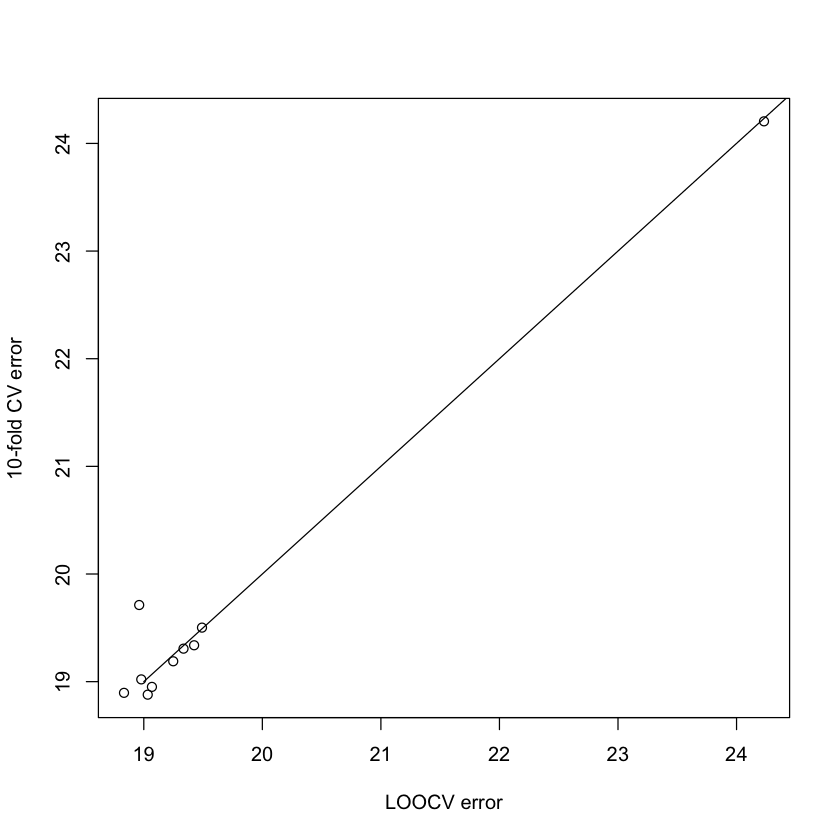

In [24]:
# Reset the seed
set.seed(17)

# Repeat our previous loop  but use K-fold CV 
# where K = 10 and up to a 5th order polynomial
cv.error.10 = rep(0,10) # Always have to specify your output object
for (i in 1:10){
  glm.fit=glm(mpg~poly(horsepower,i), data=Auto) #get the glm fit for all 10 polynomials
  cv.error.10[i] = cv.glm(Auto, glm.fit,K=10)$delta[1]
}

plot(cv.error, cv.error.10, xlab="LOOCV error", ylab="10-fold CV error")
lines(c(19,25),c(19,25))


Notice how similar the results are for 5-fold CV & LOOCV, but the folding results run faster! 

# Extracting $y$ predictions for each fold

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0       ✔ purrr   0.3.0  
✔ tibble  2.0.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.7.2       ✔ stringr 1.4.0  
✔ readr   1.1.1       ✔ forcats 0.2.0  
Warning message:
“package ‘ggplot2’ was built under R version 3.4.4”Warning message:
“package ‘tibble’ was built under R version 3.4.4”Warning message:
“package ‘purrr’ was built under R version 3.4.4”Warning message:
“package ‘dplyr’ was built under R version 3.4.4”Warning message:
“package ‘stringr’ was built under R version 3.4.4”── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


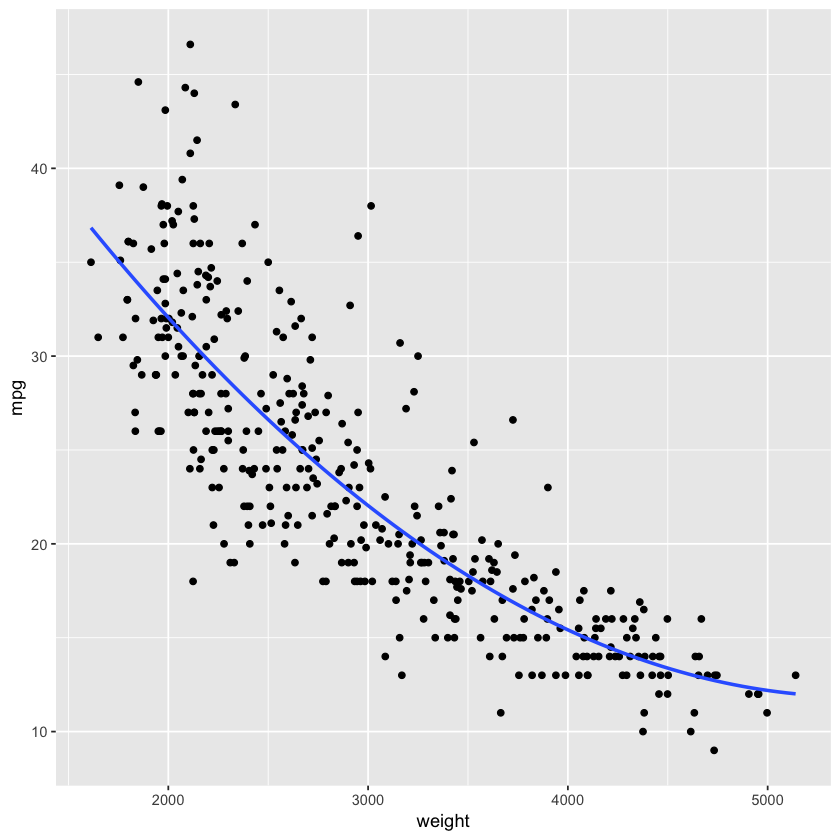

In [26]:
library(tidyverse)
ggplot(aes(weight, mpg),data=Auto) + geom_point() + stat_smooth(method = "lm", formula = y ~ poly(x,2), se = FALSE)

To easily get $\hat{y}$ and the parameter estimates for each fold, you can instead use the [caret package](https://topepo.github.io/caret/model-training-and-tuning.html). Then you can use those estimates to quantify error however you like. 

In [27]:
library(caret) #use the caret library to automatically get the y predictions 
set.seed(2)

tc <- trainControl("cv",,savePred=T) #save predictions, use k=10 cross-validation
(fit <- train(mpg~poly(weight,2),data=Auto,method="glm",trControl=tc))

head(fit$pred) #get the predictions and the observed values and profit! now you can use the predictions from each fold however you like. 

Warning message:
“package ‘caret’ was built under R version 3.4.4”Loading required package: lattice

Attaching package: ‘lattice’

The following object is masked from ‘package:boot’:

    melanoma


Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift



Generalized Linear Model 

392 samples
  1 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 352, 352, 353, 354, 353, 352, ... 
Resampling results:

  RMSE    Rsquared   MAE     
  4.1069  0.7290987  3.074199


pred,obs,rowIndex,parameter,Resample
17.14419,15,2,none,Fold01
13.74254,10,27,none,Fold01
25.44510,19,33,none,Fold01
18.79969,16,34,none,Fold01
19.88420,18,37,none,Fold01
12.53899,13,43,none,Fold01


In [28]:
fit$resample #getting test fit statistics for each sample

RMSE,Rsquared,MAE,Resample
3.786921,0.7261991,2.926025,Fold01
3.403222,0.8244962,2.494260,Fold02
3.257303,0.8032998,2.289237,Fold03
3.782447,0.7659864,2.564258,Fold04
4.949981,0.5919681,3.934656,Fold05
6.031819,0.5412517,4.590667,Fold06
3.857128,0.7513033,3.014984,Fold07
3.782959,0.8585855,2.742170,Fold08
3.836319,0.7235117,2.918716,Fold09
4.380905,0.7043847,3.267015,Fold10


In [29]:
fit_predictions <- fit$pred

In [30]:
fit_predictions$fold <- str_sub(fit_predictions$Resample, start=-2)

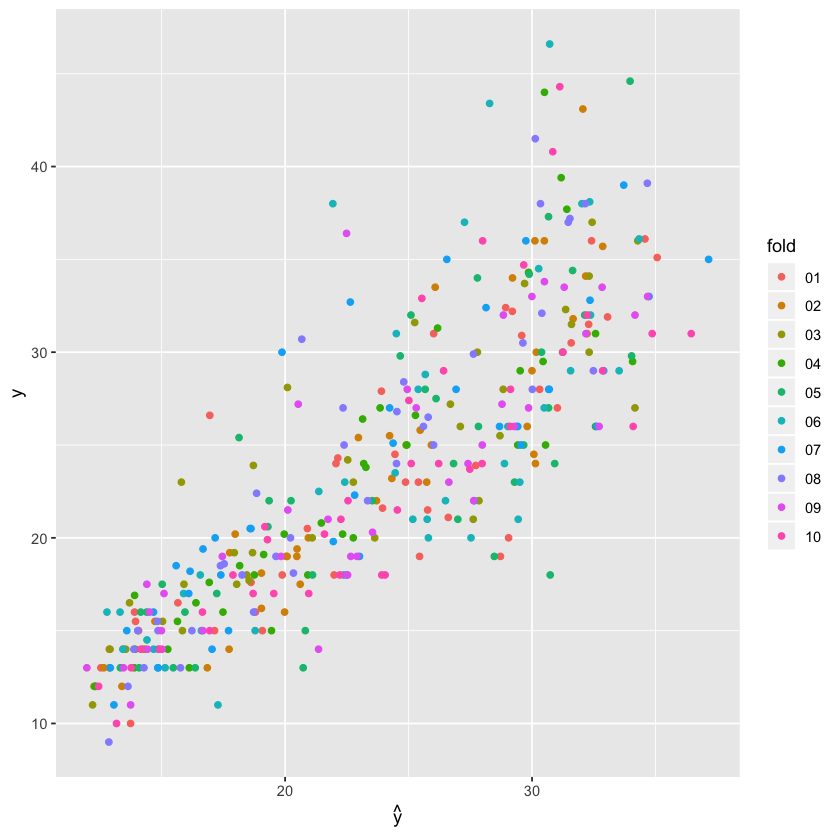

In [31]:
library(latex2exp) #this library can render latex formulae for plot labels
ggplot(data=fit_predictions, aes(pred,obs, col=fold)) + geom_point() + xlab(TeX("$\\hat{y}$")) + ylab('y')

In [32]:
attributes(fit) #you can see all of the attributes of the model object this way

$names
 [1] "method"       "modelInfo"    "modelType"    "results"      "pred"        
 [6] "bestTune"     "call"         "dots"         "metric"       "control"     
[11] "finalModel"   "preProcess"   "trainingData" "resample"     "resampledCM" 
[16] "perfNames"    "maximize"     "yLimits"      "times"        "levels"      
[21] "terms"        "coefnames"    "xlevels"     

$class
[1] "train"         "train.formula"

In [33]:
fit$modelType
fit$coefnames
fit$method

[1] "Regression"

[1] "poly(weight, 2)1" "poly(weight, 2)2"

[1] "glm"

# Simulation and testing

**Generate and store simulated data, as follows:**

>``set.seed(10)
x<-rnorm(100)
y<-x-2*x^2+rnorm(100)
df<-data.frame(x,y)
``

a) In this dataset, what is $n$ and what is $p$? <br>
b) Write the model used to generate the data in equation form. <br>
c) Using ggplot, show the relationship between $x$ and $y$. <br>
e) Set a random seed. Then estimate each of the following OLS regression models and use LOOCV: <br>
    *$$Y = \beta_0 + \beta_1X +\epsilon$$
    *$$Y = \beta_0 + \beta_1X + \beta_2X^2 + \epsilon$$
    *$$Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$$
    *$$Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \beta_4X^4 + \epsilon$$
   
f) Calculate and plot the training and the test error for each of these models. Which model has the lowest test error and why? <br>
g) Choose a different seed and conduct LOOCV again. Are the results the same? Why?<br>